# Make Gene vs Tumor Type Heatmap for CHD monoallelic

In [1]:
source("~/bin/da.R")

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”

In [11]:
save_pheatmap <- function(x, filename, width=800, height=1000) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   svg(filename, pointsize = 300 )
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [3]:
k = read.csv("../maf_res/gene_vs_tt_CHD_only_monoallelic.csv", sep="\t")
kmat = as.matrix( k[-1] )
rownames(kmat) = k[,1]

In [4]:
kmat %>% head

,ACT,CA,CNS,EWS,GCT,HGG,LGG,NBL,OS,OST,RHB,STS,WLM
CHD7,0,0,0,0,1,0,1,0,0,0,1,0,0
EP300,1,0,0,0,0,0,0,0,0,0,0,0,0
FBN2,0,2,0,0,0,0,0,1,0,0,1,0,0
KMT2D,0,0,1,0,0,0,0,0,0,0,0,0,0
RAI1,0,0,2,0,0,0,1,0,0,0,0,0,1
NF1,0,0,15,0,0,2,1,2,0,0,2,0,0


In [5]:
kmat %>% dim

[1] 26 13

In [7]:
print( colSums(kmat) )

ACT  CA CNS EWS GCT HGG LGG NBL  OS OST RHB STS WLM 
  1   2  19   1   2   4   6  11   5   1   7   2   8 


In [8]:
kmat[1:26,colnames(kmat)]

,ACT,CA,CNS,EWS,GCT,HGG,LGG,NBL,OS,OST,RHB,STS,WLM
CHD7,0,0,0,0,1,0,1,0,0,0,1,0,0
EP300,1,0,0,0,0,0,0,0,0,0,0,0,0
FBN2,0,2,0,0,0,0,0,1,0,0,1,0,0
KMT2D,0,0,1,0,0,0,0,0,0,0,0,0,0
RAI1,0,0,2,0,0,0,1,0,0,0,0,0,1
NF1,0,0,15,0,0,2,1,2,0,0,2,0,0
MYH7,0,0,1,0,0,0,0,0,3,0,0,0,1
TAB2,0,0,0,1,0,0,0,0,0,0,0,0,0
GATA4,0,0,0,0,1,0,0,0,1,0,0,0,0
TGFBR2,0,0,0,0,0,1,0,0,0,0,0,0,0


png 
  2

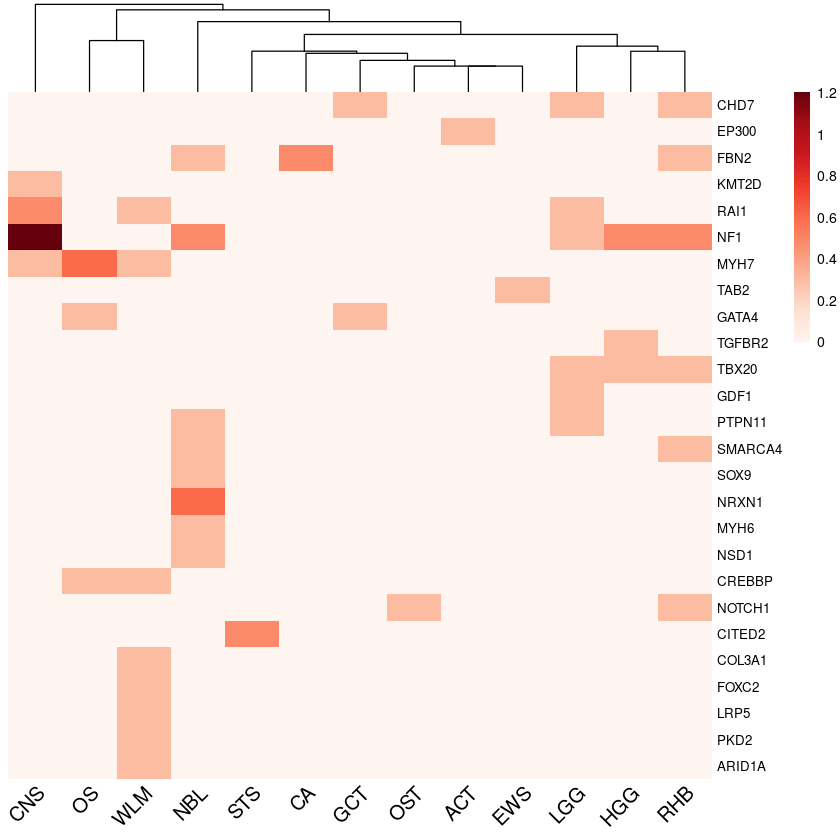

In [12]:
ofp="../plots/CHD_monoallelic_gene_vs_tt_log_red_01.svg"
cols = colorRampPalette(c("#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"))(200)
x= pheatmap(log10( kmat[1:26,colnames(kmat)]+1 ), cluster_cols = T, cluster_rows = F ,border_color = F, color =cols, angle_col=45, fontsize = 8.5, fontsize_row=8, fontsize_col = 12)
save_pheatmap(x,ofp )